In [1]:
print('Ritu')

Ritu


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from gensim.utils import simple_preprocess

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dropout,LSTM,Dense
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
df = pd.read_csv('SMSSpamCollection',sep = '\t',names= ['label','message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [9]:
corpus = []
lemma = WordNetLemmatizer()
for i in df['message']:
  corpus.append(' '.join([lemma.lemmatize(word) for word in simple_preprocess(re.sub('[^a-zA-Z]',' ',i)) if word not in stopwords.words('english')]))
corpus

['go jurong point crazy available bugis great world la buffet cine got amore wat',
 'ok lar joking wif oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate apply',
 'dun say early hor already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight cried enough today',
 'six chance win cash pound txt csh send cost day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim www dbuk net lccltd pobox ldnw rw',
 'searching right word

In [10]:
print(corpus[0])
print(df.message[0])

go jurong point crazy available bugis great world la buffet cine got amore wat
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [12]:
vocap_size = 10000
onehotData = [one_hot(sent,vocap_size) for sent in corpus]
onehotData

[[4552,
  1054,
  1780,
  6805,
  3447,
  6495,
  5954,
  1356,
  9322,
  7141,
  6844,
  3989,
  3272,
  1720],
 [8926, 2541, 311, 6677, 754],
 [9316,
  3513,
  1890,
  9592,
  8549,
  4018,
  2113,
  7982,
  8265,
  1971,
  2207,
  4587,
  4018,
  4127,
  3513,
  906,
  116,
  5367,
  6576,
  7135],
 [6591, 5186, 1040, 320, 8616, 5186],
 [2550, 2126, 4552, 4580, 8622, 9381, 6529],
 [5450,
  2898,
  2895,
  9278,
  6451,
  5546,
  3002,
  2361,
  7541,
  8433,
  8926,
  1390,
  116,
  1518,
  7253,
  4357],
 [9670, 2155, 3002, 4529, 7059, 3002, 5903, 9020],
 [7469,
  7911,
  1473,
  1473,
  5451,
  1880,
  309,
  4359,
  5396,
  7258,
  5452,
  6816,
  4193,
  6465,
  7258],
 [1479,
  6879,
  7614,
  7310,
  5385,
  9475,
  7003,
  7012,
  8157,
  2802,
  8157,
  4498,
  2656,
  9195,
  9758],
 [6651,
  1128,
  8070,
  106,
  9534,
  2561,
  6651,
  8998,
  9316,
  2802,
  6651,
  106,
  2494,
  9316],
 [535, 6283, 7632, 7734, 6471, 5568, 9362, 7295, 4197, 4138, 4672],
 [1418,
  7836,

In [18]:
[] in onehotData

True

In [19]:
onehotData.count([])


13

In [20]:
drop_index = [i for i in range(len(onehotData)) if onehotData[i] == []]
drop_index

[253, 805, 960, 1553, 1612, 2807, 3376, 4117, 4293, 4575, 4824, 4856, 5173]

In [21]:
while [] in onehotData:
  onehotData.remove([])
df.drop(index = drop_index,inplace = True)
df.reset_index(inplace = True, drop = True )

In [22]:
len(df),len(onehotData)

(5559, 5559)

In [23]:
maxlen = max([len(x) for x in onehotData])
print(maxlen)
padData = pad_sequences(onehotData,maxlen = maxlen, padding = 'pre')
padData

75


array([[   0,    0,    0, ..., 3989, 3272, 1720],
       [   0,    0,    0, ...,  311, 6677,  754],
       [   0,    0,    0, ..., 5367, 6576, 7135],
       ...,
       [   0,    0,    0, ..., 6845, 6504, 4124],
       [   0,    0,    0, ..., 7293, 4872, 9316],
       [   0,    0,    0, ..., 6633, 4275, 2935]], dtype=int32)

In [24]:
n_features = 100

In [26]:
model = Sequential([
    Embedding(input_dim = vocap_size, output_dim = n_features,input_length = maxlen),
    Dropout(0.3),
    LSTM(100,return_sequences = True),
    Dropout(0.3),
    LSTM(100,return_sequences = True),
    Dropout(0.3),
    LSTM(50),
    Dropout(0.3),
    Dense(1,activation = 'sigmoid'),
])
model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
le = LabelEncoder()
y = le.fit_transform(df['label'])
y

array([0, 0, 1, ..., 0, 0, 0])

In [32]:
X_train,X_test,y_train,y_test = train_test_split(padData,y,test_size = 0.23,random_state = 32001)

In [35]:
earlystop = EarlyStopping(monitor = 'val_loss',
                          patience = 0,
                          min_delta = 0.0001,
                          verbose = 1)

In [38]:
history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 30,callbacks = [earlystop])

Epoch 1/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 25s 182ms/step - accuracy: 0.9987 - loss: 0.0066 - val_accuracy: 0.9726 - val_loss: 0.0866
Epoch 2/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 56s 298ms/step - accuracy: 0.9985 - loss: 0.0083 - val_accuracy: 0.9750 - val_loss: 0.0849
Epoch 2: early stopping


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step
0.9749804534792806
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1103
           1       0.92      0.90      0.91       176

    accuracy                           0.97      1279
   macro avg       0.95      0.94      0.95      1279
weighted avg       0.97      0.97      0.97      1279



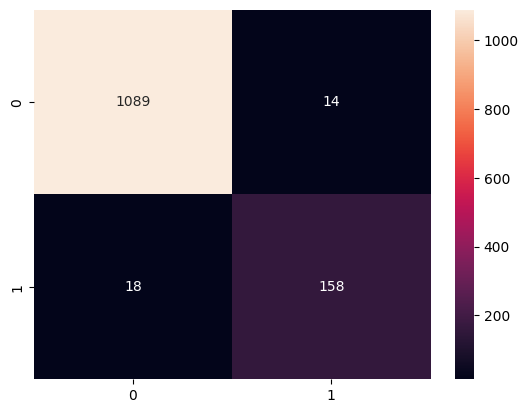

In [39]:
y_pred = np.where(model.predict(X_test)>=0.5,1,0)
print(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')
print(classification_report(y_test,y_pred))


In [41]:
history.history

{'accuracy': [0.9976635575294495, 0.9974299073219299],
 'loss': [0.011921239085495472, 0.011680633760988712],
 'val_accuracy': [0.9726348519325256, 0.9749804735183716],
 'val_loss': [0.08658169955015182, 0.0848563015460968]}

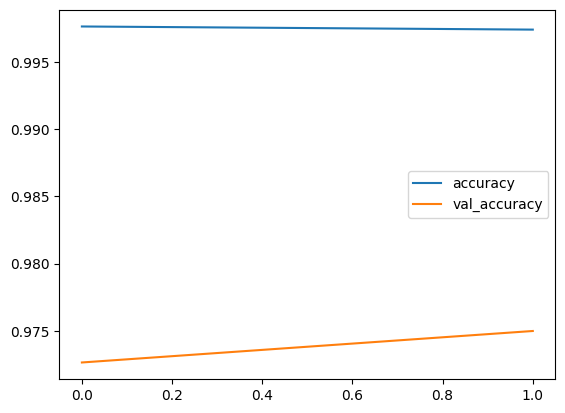

In [52]:
plt.plot(history.epoch,history.history['accuracy'],label = 'accuracy')
plt.plot(history.epoch, history.history['val_accuracy'],label = 'val_accuracy')
plt.legend()
plt.show()

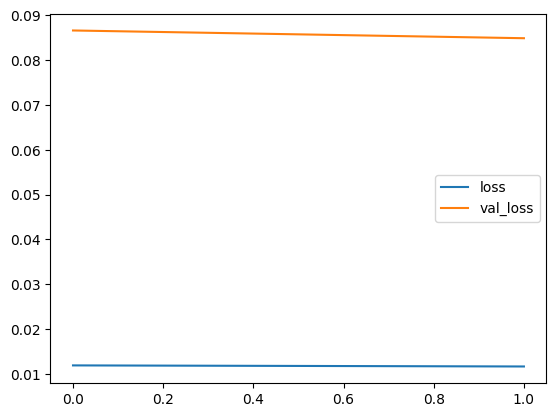

In [51]:
plt.plot(history.epoch,history.history['loss'],label = 'loss')
plt.plot(history.epoch,history.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()